In [348]:
import numpy as np

In [349]:
# Create 1 10 armed bandit
arms = np.random.normal(loc=0.0, scale=1.0, size=10)
print(arms)
dists = {}
for idx, arm in enumerate(arms):
    dists[idx] = np.random.normal(loc=arm, scale=1.0)

[-0.25062359 -0.59888208 -1.64386977 -0.10402187  1.2758804  -1.39364809
  1.12173193 -0.01588503  0.69858991 -0.87788745]


In [350]:
%matplotlib inline
import matplotlib.pyplot as plt

class History():
    def __init__(self, actions: int):
        self.actions = actions
        self.values = {}
        self.times = []
        self.rewards = {}
        self.rewards[0] = 0
        self.counter = 0
        for a in range(1, self.actions + 1):
            self.values[a] = []
        
    def add_value(self, action: int, value: float):
        self.counter += 1
        self.times.append(self.counter)
        self.rewards[self.counter] = self.rewards[self.counter - 1] + value
        for a in range(1, self.actions + 1):
            if action == a:
                self.values[a].append(value)
                continue
            #try:
            if len(self.values[a]) == 0:
                self.values[a].append(0)
            else:
                self.values[a].append(self.values[a][-1])
        
    def print_history(self):
        for a in range(1, self.actions + 1):
            plt.plot(self.times, self.values[a], label=f"{a}")
        plt.legend()
        
    def print_avg_reward(self, name: str):
        avg_rewards = {}
        for count, agg_val in self.rewards.items():
            if count == 0:
                avg_rewards[count] = 0
                continue
            avg_rewards[count] = agg_val/count
        plt.plot(avg_rewards.keys(), avg_rewards.values(), label=f"Avg. reward {name}")
        plt.legend()

# Define Model
class Model():
    def __init__(self, epsylon: float, reward_dest: np.array):
        self.history = History(10)
        self.epsylon = epsylon
        self.arms = {}
        self.rewards = {}
        self.exp_reward = {}
        self.iterations = {}
        for i in range(1, 11):
            self.arms[i] = reward_dest[i-1]
            self.rewards[i] = 0.0
            self.exp_reward[i] = 0
            self.iterations[i] = 0
        
    def fit(self, runs: int):
        for n in range(0, runs):
            self.make_choice()
    
    def make_choice(self):
        action = self.__choice_with_epsylon()
        #print(f"Selected action: {action}")
        reward = self.__get_reward(action)
        #print(f"Reward: {reward}")
        self.__calc_exp_reward(action, reward)
        self.history.add_value(action, self.exp_reward[action])
    
    def __calc_exp_reward(self, action: int, reward: float):
        self.iterations[action] += 1
        self.exp_reward[action] = self.exp_reward[action] + 1/self.iterations[action] * (reward - self.exp_reward[action])
        #print(f"Calc Reward: {self.exp_reward[action]}")
    
    def __get_reward(self, action: int):
        return np.random.normal(loc=self.arms[action], scale=1.0)
    
    def __choice_with_epsylon(self):
        sel = np.random.rand()
        if sel < self.epsylon:
            return np.random.randint(low=1, high=11, size=1)[0]
        best_action = -1
        max_prob = -1.0
        for i, Q in self.exp_reward.items():
            if Q > max_prob:
                best_action = i
                max_prob = Q
        return best_action
    
    def print_model(self):
        print(f"Epsylon: {self.epsylon}, Arms: {self.arms}\nExp. reward: {self.exp_reward}")
        plt.scatter(self.arms.keys(), self.arms.values(), c="blue", label="Values")
        plt.scatter(self.exp_reward.keys(), self.exp_reward.values(), c="red", label="Predictions")
        plt.grid(True)
        plt.legend()
        
    def plot_history(self):
        self.history.print_history()
    
    def plot_avg_reward(self, name: str):
        self.history.print_avg_reward(name=name)
            

In [351]:
test = np.random.randint(low=1, high=10, size=1)[0]
type(test)
print(test)
reward_dest = np.random.normal(loc=0.0, scale=1.0, size=10)
print(reward_dest)

7
[ 1.75555287  0.86431621 -1.0853463  -1.07741839 -0.70633485  1.50294569
 -0.36911079  0.831902    1.73985778  0.87701069]


Epsylon: 0.01, Arms: {1: 1.7555528716136464, 2: 0.8643162130738568, 3: -1.0853463047258813, 4: -1.0774183873682373, 5: -0.7063348488448052, 6: 1.5029456879584273, 7: -0.3691107903459971, 8: 0.8319020027177917, 9: 1.7398577758625482, 10: 0.8770106885432255}
Exp. reward: {1: 1.7615669700254526, 2: 1.0055588032516913, 3: -1.017837498386749, 4: -1.3605742233922058, 5: -1.1733912574239063, 6: 1.6660244963703545, 7: -0.4363540621202735, 8: 0.6551215166079256, 9: 1.7524416991653178, 10: 0.7691752050223493}


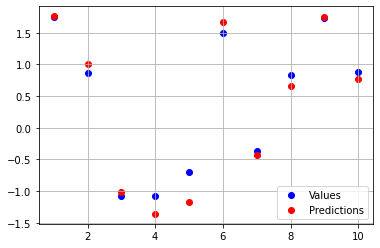

In [352]:
model001 = Model(epsylon=0.01, reward_dest=reward_dest)
model01 = Model(epsylon=0.1, reward_dest=reward_dest)
model0 = Model(epsylon=0.0, reward_dest=reward_dest)
model001.fit(10000)
model01.fit(10000)
model0.fit(10000)
model001.print_model()

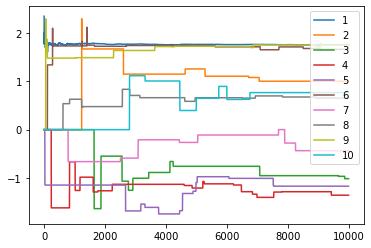

In [353]:
model001.plot_history()

Epsylon: 0.1, Arms: {1: 1.7555528716136464, 2: 0.8643162130738568, 3: -1.0853463047258813, 4: -1.0774183873682373, 5: -0.7063348488448052, 6: 1.5029456879584273, 7: -0.3691107903459971, 8: 0.8319020027177917, 9: 1.7398577758625482, 10: 0.8770106885432255}
Exp. reward: {1: 1.6672066892304642, 2: 0.856660484164542, 3: -1.2990903420857265, 4: -1.1059682718936852, 5: -0.8488347976759377, 6: 1.535332954466745, 7: -0.24453969690078003, 8: 0.8091018658152784, 9: 1.7591896866253331, 10: 0.9188774953910133}


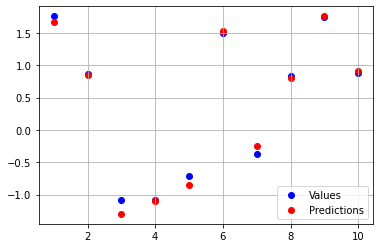

In [354]:
model01.print_model()

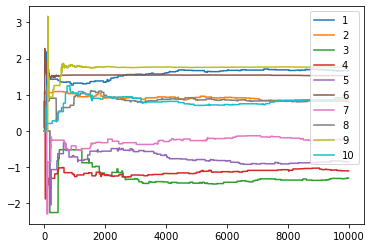

In [355]:
model01.plot_history()

Epsylon: 0.0, Arms: {1: 1.7555528716136464, 2: 0.8643162130738568, 3: -1.0853463047258813, 4: -1.0774183873682373, 5: -0.7063348488448052, 6: 1.5029456879584273, 7: -0.3691107903459971, 8: 0.8319020027177917, 9: 1.7398577758625482, 10: 0.8770106885432255}
Exp. reward: {1: 1.757370327380425, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}


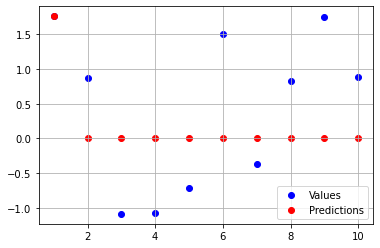

In [356]:
model0.print_model()

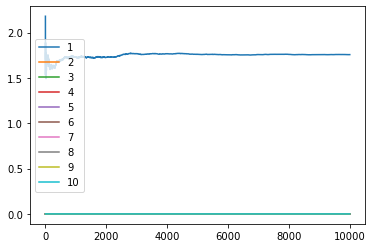

In [357]:
model0.plot_history()

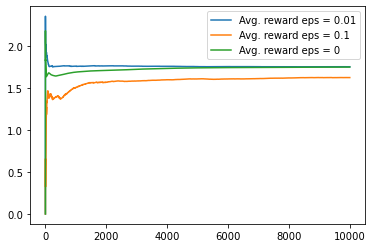

In [358]:
model001.plot_avg_reward(name="eps = 0.01") 
model01.plot_avg_reward(name="eps = 0.1")
model0.plot_avg_reward(name="eps = 0")